<h3> CAR-PRICE-PREDICTION USING REGRESSION </H3>

<h3><u>Dataset collection</u> </h3>
<h3>-I got my Dataset "cars24dataset" from Kaggels.</h3>
<h3>-cars24dataset contains details about old cars.</h3>

<h3><u>Problem Statement:</u>
The used car market is growing rapidly, and pricing can be influenced by numerous features. Manually estimating car prices is prone to error and bias. Machine learning provides a scalable and data-driven approach to accurately estimate car prices.</h3>


<h3><u></u>Objective</u></h3>

- Clean and preprocess the car data.
- Perform exploratory data analysis (EDA).
- Build and evaluate regression models for accurate price prediction.
-Interpret the model outputs and identify key influencing features.


<h3><u>Dataset Description</u></h3>

-Source: Dataset loaded from 'cars24data.csv'.
-Target Variable: Selling_Price

-Features: Name, Year, Kilometers Driven, Fuel Type, Transmission, Owner, Mileage, Engine, Power, Seats.


<h3>importing libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
df=pd.read_csv('cars24data.csv')

In [3]:
df

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2
...,...,...,...,...,...,...,...,...,...,...,...
1440,2021 Maruti Ertiga VXI SHVS,862000,2021,1462,No,Manual,19901,1,Petrol,1,0
1441,2015 Maruti Ciaz ZXI,507000,2015,1373,No,Manual,50022,1,Petrol,5,2
1442,2019 Maruti Baleno DELTA PETROL 1.2,554000,2019,1197,Yes,Manual,58679,1,Petrol,24,4
1443,2017 Maruti Ciaz S 1.4 MT PETROL,557000,2017,1373,Yes,Manual,73948,2,Petrol,4,5


In [4]:
# View the first 5 rows
print(df.head())

# Shape of the dataset
print("Shape of dataset:", df.shape)

# Info about datatypes and nulls
df.info()

# Summary statistics
df.describe()


                            Model Name    Price  Manufacturing_year  \
0                2017 Maruti Swift VXI   561000                2017   
1  2016 Maruti Baleno DELTA PETROL 1.2   498000                2016   
2                2020 Maruti Swift VXI   577000                2020   
3       2022 Maruti Ertiga VXI AT SHVS  1084000                2022   
4                2019 Maruti Dzire VXI   603000                2019   

   Engine capacity Spare key Transmission  KM driven  Ownership Fuel type  \
0             1197        No       Manual      25847          2    Petrol   
1             1197       Yes       Manual      55511          2    Petrol   
2             1197        No       Manual      47110          1    Petrol   
3             1462       Yes    Automatic      35378          1    Petrol   
4             1197       Yes       Manual      91856          1    Petrol   

   Imperfections  Repainted Parts  
0              6                2  
1             12                1  
2 

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


In [5]:
# Count missing values
print(df.isnull().sum())

Model Name            0
Price                 0
Manufacturing_year    0
Engine capacity       0
Spare key             0
Transmission          0
KM driven             0
Ownership             0
Fuel type             0
Imperfections         0
Repainted Parts       0
dtype: int64


In [6]:
# duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# unique
df.nunique()

Model Name             573
Price                  598
Manufacturing_year      14
Engine capacity          7
Spare key                2
Transmission             2
KM driven             1439
Ownership                3
Fuel type                3
Imperfections           42
Repainted Parts         21
dtype: int64

In [8]:
#univariable analysis

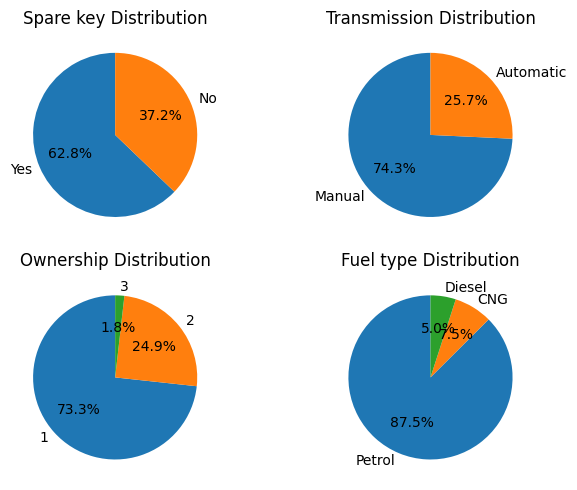

In [9]:
# Define categorical columns for pie charts
categorical_columns = ['Spare key', 'Transmission', 'Ownership', 'Fuel type']

# Set up the figure for pie charts
fig, axs = plt.subplots(2, 2, figsize=(7, 5))
axs = axs.flatten()

# Plot a pie chart for each categorical column
for i, column in enumerate(categorical_columns):
    counts = df[column].value_counts()
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{column} Distribution')

# Adjust layout and display
plt.tight_layout()
plt.show()


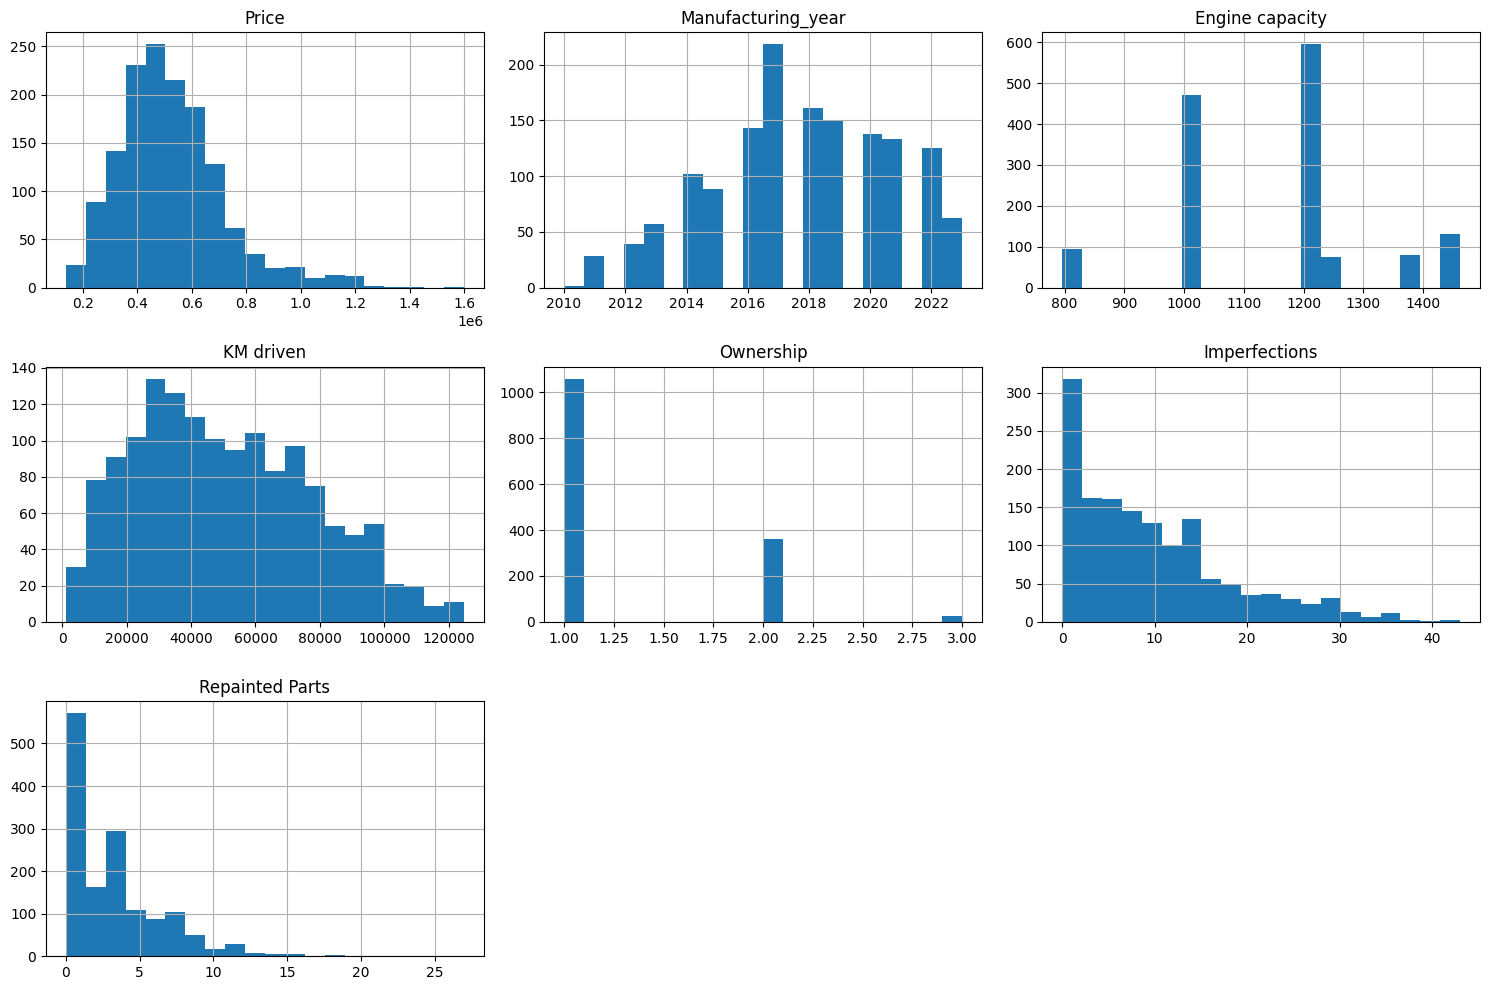

Fuel type
Petrol    1264
CNG        109
Diesel      72
Name: count, dtype: int64


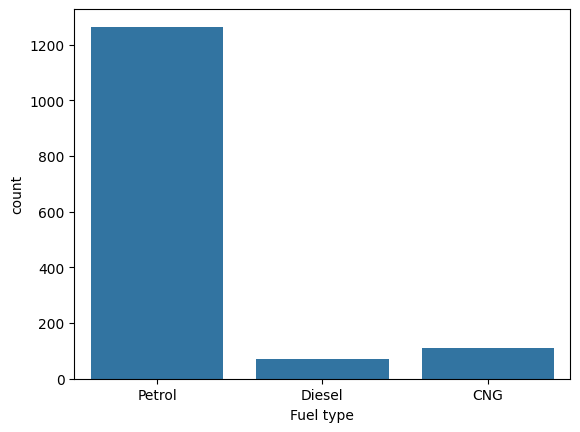

In [10]:
# Example for numerical columns
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# For categorical features
print(df['Fuel type'].value_counts())
sns.countplot(data=df, x='Fuel type')
plt.show()


In [11]:
# Bivariate analysis

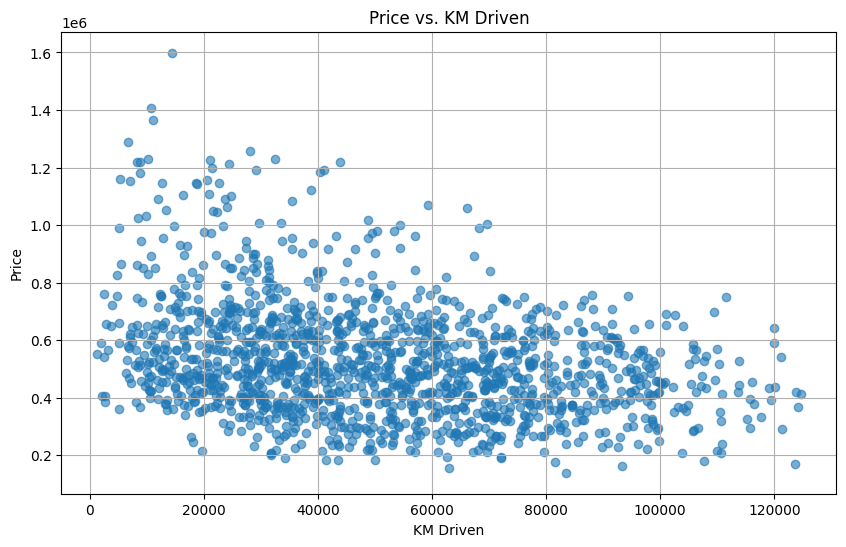

In [12]:
# Create a scatter plot of Price vs. KM driven
plt.figure(figsize=(10, 6))
plt.scatter(df['KM driven'], df['Price'], alpha=0.6)
plt.title('Price vs. KM Driven')
plt.xlabel('KM Driven')
plt.ylabel('Price')
plt.grid(True)
plt.show()

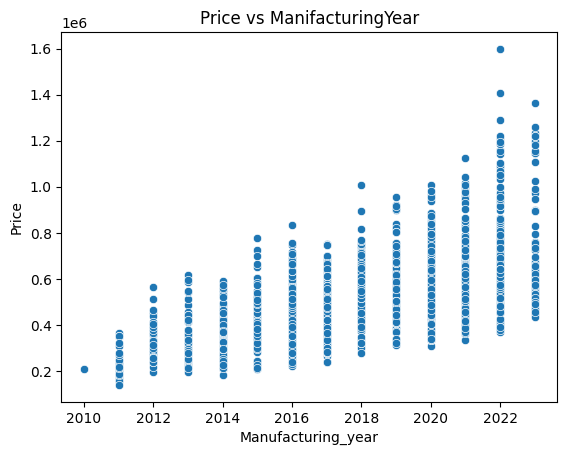

In [13]:
# Price vs Year
sns.scatterplot(data=df, x='Manufacturing_year', y='Price')
plt.title("Price vs ManifacturingYear")
plt.show()



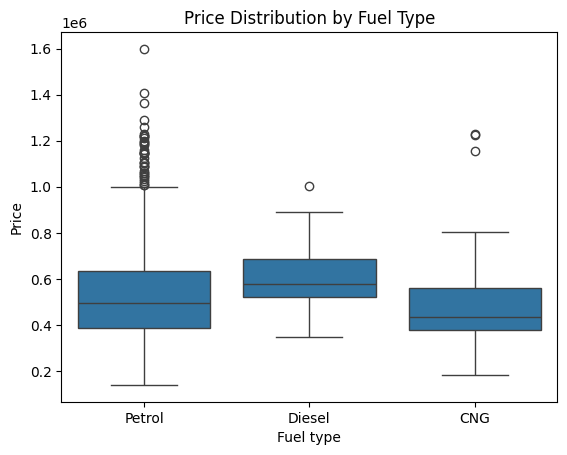

In [14]:
# Price vs Fuel Type
sns.boxplot(data=df, x='Fuel type', y='Price')
plt.title("Price Distribution by Fuel Type")
plt.show()

In [15]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculate IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df_no_outliers = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (1445, 11)
After removing outliers: (1341, 11)


In [16]:
df_cleaned = df_no_outliers

In [17]:
# Drop 'Model Name' if you want to ignore it due to high cardinality
df_cleaned = df_cleaned.drop(columns=['Model Name','Spare key'])

<h2> label encoding </h2>

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [19]:
le = LabelEncoder()
df_cleaned['Transmission'] = le.fit_transform(df_cleaned['Transmission'])

In [20]:
df_cleaned['Transmission']

0       1
1       1
2       1
4       1
5       1
       ..
1440    1
1441    1
1442    1
1443    1
1444    1
Name: Transmission, Length: 1341, dtype: int64

In [21]:
df_cleaned

,Price,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,561000,2017,1197,1,25847,2,Petrol,6,2
1,498000,2016,1197,1,55511,2,Petrol,12,1
2,577000,2020,1197,1,47110,1,Petrol,4,2
4,603000,2019,1197,1,91856,1,Petrol,3,2
5,233000,2014,796,1,43780,1,Petrol,10,2
...,...,...,...,...,...,...,...,...,...
1440,862000,2021,1462,1,19901,1,Petrol,1,0
1441,507000,2015,1373,1,50022,1,Petrol,5,2
1442,554000,2019,1197,1,58679,1,Petrol,24,4
1443,557000,2017,1373,1,73948,2,Petrol,4,5


In [22]:
# one hot encoding
df_encoded = pd.get_dummies(df_cleaned, columns=['Fuel type'], prefix='Fuel type')
df_encoded = df_encoded.astype(int)  # Force to 0/1

In [23]:
df_encoded

,Price,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Imperfections,Repainted Parts,Fuel type_CNG,Fuel type_Diesel,Fuel type_Petrol
0,561000,2017,1197,1,25847,2,6,2,0,0,1
1,498000,2016,1197,1,55511,2,12,1,0,0,1
2,577000,2020,1197,1,47110,1,4,2,0,0,1
4,603000,2019,1197,1,91856,1,3,2,0,0,1
5,233000,2014,796,1,43780,1,10,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1440,862000,2021,1462,1,19901,1,1,0,0,0,1
1441,507000,2015,1373,1,50022,1,5,2,0,0,1
1442,554000,2019,1197,1,58679,1,24,4,0,0,1
1443,557000,2017,1373,1,73948,2,4,5,0,0,1


In [24]:
df_cleaned=df_encoded

In [25]:
# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

print(correlation_matrix)

                       Price  Manufacturing_year  Engine capacity  \
Price               1.000000            0.577425         0.698394   
Manufacturing_year  0.577425            1.000000         0.045295   
Engine capacity     0.698394            0.045295         1.000000   
Transmission       -0.244243           -0.143244        -0.072432   
KM driven          -0.255904           -0.510780         0.076298   
Ownership          -0.170112           -0.203981        -0.040658   
Imperfections      -0.163182           -0.251138         0.004758   
Repainted Parts    -0.109670           -0.172681         0.039563   
Fuel type_CNG      -0.097093            0.038082        -0.185287   
Fuel type_Diesel    0.109693           -0.173350         0.159851   
Fuel type_Petrol    0.008678            0.079899         0.048189   

                    Transmission  KM driven  Ownership  Imperfections  \
Price                  -0.244243  -0.255904  -0.170112      -0.163182   
Manufacturing_year     -0

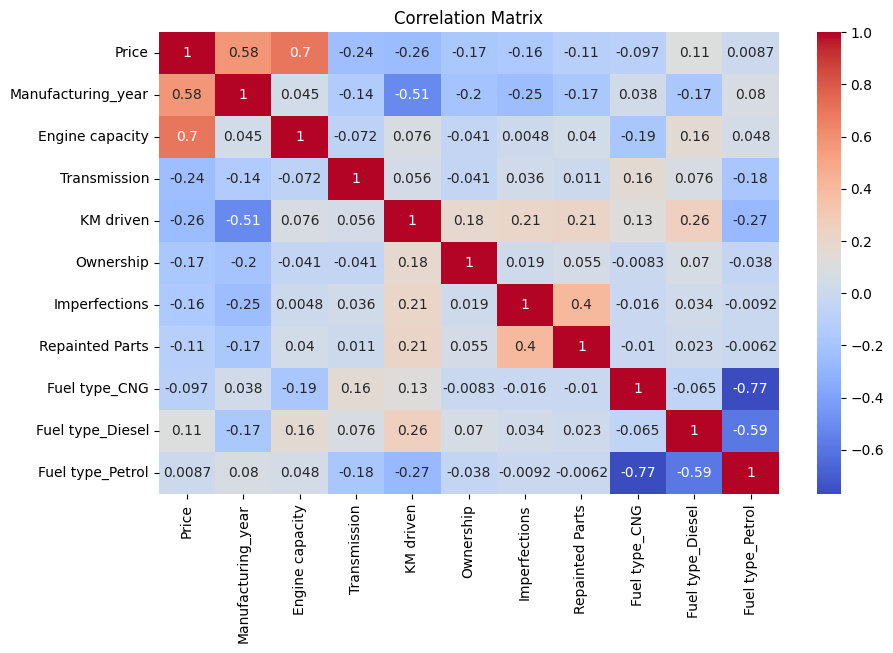

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [27]:
# View the new columns created
print(df_cleaned.columns)

Index(['Price', 'Manufacturing_year', 'Engine capacity', 'Transmission',
       'KM driven', 'Ownership', 'Imperfections', 'Repainted Parts',
       'Fuel type_CNG', 'Fuel type_Diesel', 'Fuel type_Petrol'],
      dtype='object')


In [28]:
print(df.columns.tolist())

['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity', 'Spare key', 'Transmission', 'KM driven', 'Ownership', 'Fuel type', 'Imperfections', 'Repainted Parts']


<h2> Assigning the X and Y values </h2>

In [29]:
x=df_cleaned.drop('Price',axis=1)
y=df_cleaned['Price']

In [30]:
print(x.shape)
print(y.shape)

(1341, 10)
(1341,)


In [31]:
df_cleaned

,Price,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Imperfections,Repainted Parts,Fuel type_CNG,Fuel type_Diesel,Fuel type_Petrol
0,561000,2017,1197,1,25847,2,6,2,0,0,1
1,498000,2016,1197,1,55511,2,12,1,0,0,1
2,577000,2020,1197,1,47110,1,4,2,0,0,1
4,603000,2019,1197,1,91856,1,3,2,0,0,1
5,233000,2014,796,1,43780,1,10,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1440,862000,2021,1462,1,19901,1,1,0,0,0,1
1441,507000,2015,1373,1,50022,1,5,2,0,0,1
1442,554000,2019,1197,1,58679,1,24,4,0,0,1
1443,557000,2017,1373,1,73948,2,4,5,0,0,1


In [32]:
# to train the model in regression(linear).
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1072, 10)
(269, 10)
(1072,)
(269,)


In [34]:
x_train

,Manufacturing_year,Engine capacity,Transmission,KM driven,Ownership,Imperfections,Repainted Parts,Fuel type_CNG,Fuel type_Diesel,Fuel type_Petrol
880,2017,998,1,81370,1,4,11,1,0,0
1392,2014,998,1,53063,2,11,5,0,0,1
642,2021,1197,1,25742,1,6,4,0,0,1
1052,2019,1197,1,54029,1,14,3,0,0,1
962,2019,998,0,70604,1,14,9,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1189,2016,998,1,19613,2,12,7,0,0,1
1226,2019,1197,0,16416,2,7,0,0,0,1
1398,2015,1196,1,48661,1,7,1,1,0,0
931,2013,998,1,66819,1,21,8,0,0,1


<h2> applying scalar </h2>

In [35]:
# applying standard scalar
from sklearn.preprocessing import StandardScaler
# useing scaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [36]:
x_train_scaled

array([[-0.29248361, -0.82168926,  0.59746299, ...,  3.38601776,
        -0.2280609 , -2.59079722],
       [-1.33185076, -0.82168926,  0.59746299, ..., -0.29533218,
        -0.2280609 ,  0.38598158],
       [ 1.09333927,  0.41078974,  0.59746299, ..., -0.29533218,
        -0.2280609 ,  0.38598158],
       ...,
       [-0.98539504,  0.40459638,  0.59746299, ...,  3.38601776,
        -0.2280609 , -2.59079722],
       [-1.67830648, -0.82168926,  0.59746299, ..., -0.29533218,
        -0.2280609 ,  0.38598158],
       [-0.63893932, -0.82168926, -1.67374384, ..., -0.29533218,
        -0.2280609 ,  0.38598158]], shape=(1072, 10))

<h1>1.stocastic gradient descent</h1>

In [37]:
# SGD---
from sklearn.linear_model import SGDRegressor
print("\n--- SGD Method ---")
sgd_model=SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.01,random_state=42)# max_iter=1000,eta=0.01 is default  
sgd_model.fit(x_train_scaled,y_train)


--- SGD Method ---


SGDRegressor(random_state=42)

In [38]:
# we have to predict TRAIN on ypre_train WITH X_TRAIN_SCALED
Ypre_train=sgd_model.predict(x_train_scaled)
print(Ypre_train)

[392347.7772185  282306.82369573 640450.3967118  ... 487688.84951846
 256121.53468766 404802.56821149]


In [39]:
# we have to predict TEST on ypre_train WITH X_TEST_SCALED
Ypre_test=sgd_model.predict(x_test_scaled)


In [40]:
# to print the column name and coefficient we use("enumeprintrate")
for idx,col_name in enumerate(x_train.columns):
    print("the coefficient for {} is {}".format(col_name,sgd_model.coef_[idx]))

the coefficient for Manufacturing_year is 82295.16303198204
the coefficient for Engine capacity is 107698.53766610725
the coefficient for Transmission is -22672.29745297268
the coefficient for KM driven is -9720.13346161892
the coefficient for Ownership is -6650.534588907046
the coefficient for Imperfections is -2475.080374618863
the coefficient for Repainted Parts is -2829.110583534106
the coefficient for Fuel type_CNG is -572.5386171456544
the coefficient for Fuel type_Diesel is 14608.252918952983
the coefficient for Fuel type_Petrol is -8964.073405715028


# summary
.coef_ gives you the weights learned by SGD.
You pair them with column names to understand feature importance and direction.
This is essential for model interpretation in linear models like SGDRegressor.

In [41]:
# model evaluation measures:(test data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_sgd=mean_squared_error(y_test,Ypre_test) # MSE
# root mean square error
rmse_sgd=np.sqrt(mse_sgd) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_sgd=r2_score(y_test,Ypre_test) #R-square


In [42]:
print(mse_sgd)

3903519751.096739


In [43]:
rmse_sgd

np.float64(62478.15419085889)

In [44]:
r2_sgd

0.8353780185124635

In [45]:
# Adjusted r2
# 1-(1-r2)*(n-1)/(n-k-1)

# r2 - COFFICIENT OF DETERMENT
# n - number of observation or data points
# K - numbers of independent variables( x variables)

adj_r2_sgd=1-(1-r2_sgd)*((len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
adj_r2_sgd

0.8289973215555823

In [46]:
# train data

# Evaluation metrics for training data
mse_train = mean_squared_error(y_train, Ypre_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, Ypre_train)

# Print the results
print("Training Set Evaluation:")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R² Score: {r2_train}")


Training Set Evaluation:
MSE: 4917583757.49813
RMSE: 70125.48579153039
R² Score: 0.8156403721371697


In [47]:
# train data

# Adjusted r2
# 1-(1-r2)*(n-1)/(n-k-1)

# r2 - COFFICIENT OF DETERMENT
# n - number of observation or data points
# K - numbers of independent variables( x variables)

adj_r2_sgd=1-(1-r2_sgd)*((len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
adj_r2_sgd

0.8338264447001399

In [48]:
# Coefficients of the model
coefficients = sgd_model.coef_

# Print the coefficients for each feature
for feature, coef in zip(x.columns, coefficients):
    print(f'{feature}: {coef}')


Manufacturing_year: 82295.16303198204
Engine capacity: 107698.53766610725
Transmission: -22672.29745297268
KM driven: -9720.13346161892
Ownership: -6650.534588907046
Imperfections: -2475.080374618863
Repainted Parts: -2829.110583534106
Fuel type_CNG: -572.5386171456544
Fuel type_Diesel: 14608.252918952983
Fuel type_Petrol: -8964.073405715028


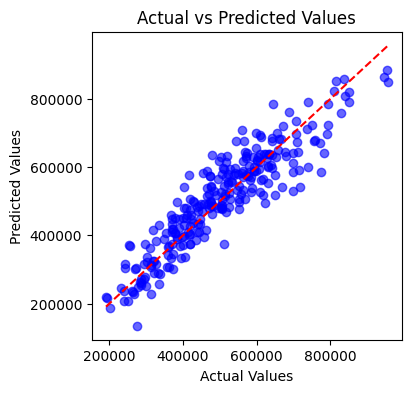

In [49]:
# visualization

import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.scatter(y_test, Ypre_test, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

----------------------------------------------------------------------------------------------------------------------------

<h1> Decision tree </h1>

In [50]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [51]:
# Build and train the decision tree Regressor
dtr_model=DecisionTreeRegressor(random_state=42)
dtr_model.fit(x_train_scaled,y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
# we have to predict TRAIN on ypre_train WITH X_TRAIN_SCALED
Ypre_train=dtr_model.predict(x_train_scaled)
print(Ypre_train)

[356000. 326000. 479000. ... 381000. 319000. 442000.]


In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# HYPERPARAMETER TUNING.
param_grid={
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}
# USING GridSearchCV (Cross validation).
grid_search=GridSearchCV(DecisionTreeRegressor(random_state=42),
                         param_grid,cv=5,scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1)
grid_search.fit(x_train_scaled,y_train)

# Best model from grid search
best_dtr=grid_search.best_estimator_
y_pred_best=best_dtr.predict(x_test_scaled)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [55]:
# best model
best_model = grid_search.best_estimator_


In [56]:
# assigning
y_pred = best_model.predict(x_train_scaled)


In [57]:
# model evaluation measures:(train data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_dtr_model=mean_squared_error(y_train,y_pred) # MSE
# root mean square error
rmse_dtr_model=np.sqrt(mse_dtr_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_dtr_model=r2_score(y_train,y_pred) #R-square


# Print the results
print("Training Set Evaluation:")
print(f"MSE: {mse_dtr_model}")
print(f"RMSE: {rmse_dtr_model}")
print(f"R² Score: {r2_dtr_model}")


Training Set Evaluation:
MSE: 4828932298.26455
RMSE: 69490.51948477972
R² Score: 0.8189639047580181


In [58]:
# adjsent r2 (train data model)
adj_r2_dtr_model=1-(1-r2_dtr_model)*((len(y_train)-1)/(len(y_train)-x_train_scaled.shape[1]-1))
adj_r2_dtr_model

0.8172576267632774

In [59]:
# we have to predict TRAIN on ypre_train WITH X_TRAIN_SCALED
Ypre_test=dtr_model.predict(x_test_scaled)
print(Ypre_test)

[264000. 904000. 755000. 416000. 630000. 519000. 372000. 527000. 469000.
 568000. 278000. 447000. 546000. 470000. 439000. 352000. 519000. 584000.
 377000. 369000. 475000. 745000. 523000. 616000. 219000. 503000. 487000.
 498000. 554000. 580000. 465000. 517000. 515000. 532000. 739000. 533000.
 588000. 386000. 490000. 670000. 517000. 513000. 477000. 587000. 543000.
 758000. 635000. 254000. 347000. 358000. 488000. 536000. 865000. 807000.
 267000. 445000. 243000. 547000. 368000. 470000. 329000. 445000. 623000.
 375000. 703000. 473000. 319000. 700000. 710000. 637000. 480000. 365000.
 694000. 362000. 379000. 442000. 397000. 267000. 337000. 287000. 278000.
 717000. 692000. 448000. 817000. 542000. 630000. 333000. 596000. 751000.
 593000. 512000. 294000. 574000. 565000. 468000. 253000. 393000. 643000.
 414000. 608000. 452000. 332000. 397000. 512000. 568000. 665000. 461000.
 555000. 703000. 548000. 470000. 633000. 363000. 362000. 425000. 528000.
 410000. 275000. 497000. 422000. 323000. 343000. 42

In [60]:
# assigning
y_pred = best_model.predict(x_test_scaled)


In [61]:
# model evaluation measures:(test data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_dtr_model=mean_squared_error(y_test,y_pred) # MSE
# root mean square error
rmse_dtr_model=np.sqrt(mse_dtr_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_dtr_model_test=r2_score(y_test,y_pred) #R-square


# Print the results
print("Testing Set Evaluation:")
print(f"MSE: {mse_dtr_model}")
print(f"RMSE: {rmse_dtr_model}")
print(f"R² Score: {r2_dtr_model_test}")



Testing Set Evaluation:
MSE: 4432207737.106823
RMSE: 66574.82810422286
R² Score: 0.8130818167778158


In [62]:
# adjescent r2 (test data model)
adj_r2_dtr_model=1-(1-r2_dtr_model_test)*((len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1))
adj_r2_dtr_model

0.8058369259552505

In [63]:
import matplotlib.pyplot as plt

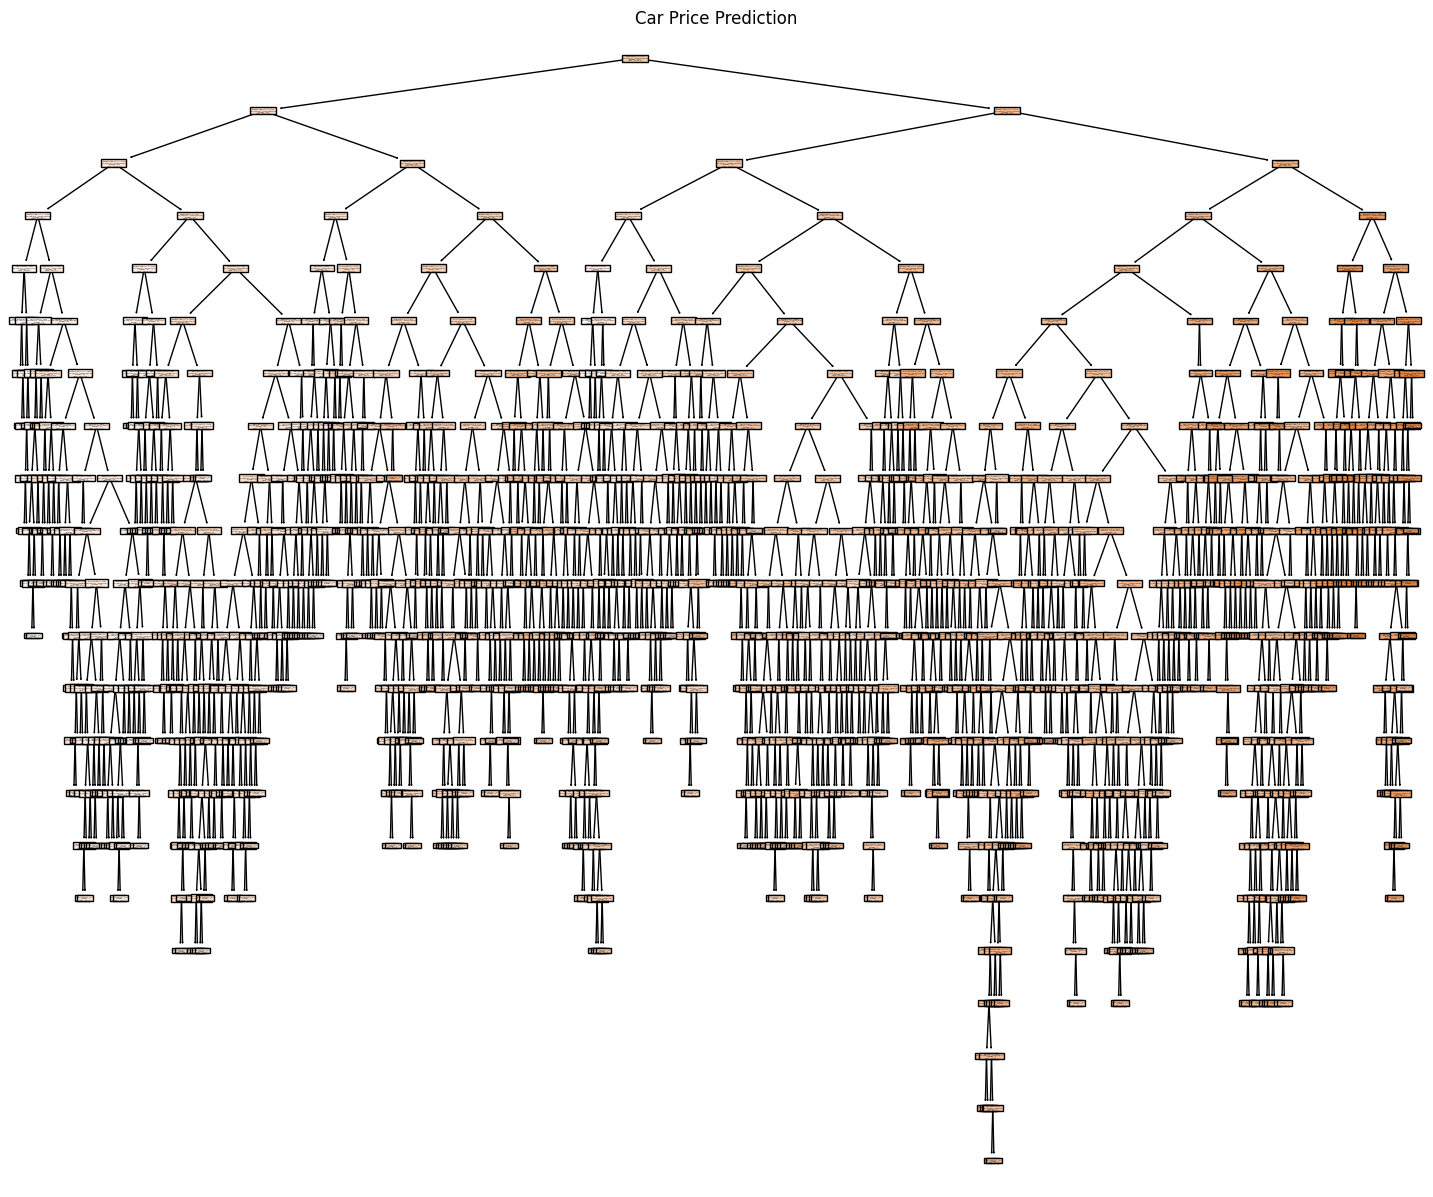

In [64]:
# plot the Decission tree
plt.figure(figsize=(18,15))
plot_tree(dtr_model,feature_names=x.columns,filled=True,label='all')
plt.title("Car Price Prediction")
plt.show()

----------------------------------------------------------------------------------------------------------------------------

<h1> RANDOM FOREST REGRESSOR </h1>

In [65]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [66]:
# Build and train the Randomforestclasifier
rfr_model=RandomForestRegressor(random_state=20)
rfr_model.fit(x_train_scaled,y_train)

RandomForestRegressor(random_state=20)

In [67]:
# after the gridsearch cv .......

In [68]:
# HYPERPARAMETER TUNING.
param_grid={
    'max_depth':[3,5,10,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
}
# USING GridSearchCV (Cross validation).
grid_search=GridSearchCV(RandomForestRegressor(random_state=42),
                         param_grid,cv=5,scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1)
grid_search.fit(x_train_scaled,y_train)

# Best model from grid search
best_rfr=grid_search.best_estimator_
y_pred_best=best_rfr.predict(x_test_scaled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [69]:
# best model
best_model_rfr = grid_search.best_estimator_


In [70]:
# assigning(train)
y_pred_rfr_train = best_model_rfr.predict(x_train_scaled)

In [71]:
y_pred_rfr_train

array([366266.95683142, 286320.62679394, 610824.97753775, ...,
       371382.30531468, 277561.94297058, 406203.75656868], shape=(1072,))

In [72]:
# model evaluation measures:(train data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_rfr_model=mean_squared_error(y_train,y_pred_rfr_train) # MSE
# root mean square error
rmse_rfr_model=np.sqrt(mse_rfr_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_rfr_model=r2_score(y_train,y_pred_rfr_train) #R-square


# Print the results
print("Training Set Evaluation:")
print(f"MSE: {mse_rfr_model}")
print(f"RMSE: {rmse_rfr_model}")
print(f"R² Score: {r2_rfr_model}")


Training Set Evaluation:
MSE: 2313352347.6044326
RMSE: 48097.32162609923
R² Score: 0.9132726967243485


In [73]:
# adj r2 (train)
adj_r2_rfr_model_train=1-(1-r2_rfr_model)*((len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
adj_r2_rfr_model_train

0.9124552857603933

In [74]:
# assigning(test)
y_pred_rfr_test = best_model_rfr.predict(x_test_scaled)

In [75]:
y_pred_rfr_test

array([267034.39923703, 859288.36374981, 760219.17384675, 497082.70793033,
       639426.71355169, 503006.14542238, 322491.98598081, 445843.22854913,
       478362.22898295, 538323.84434065, 258944.31047866, 392413.50631649,
       630129.9634901 , 444525.72189845, 470302.82178789, 343814.7109867 ,
       536334.89931222, 606806.86122213, 395338.8002431 , 433165.38337621,
       441849.47826971, 686917.95397706, 682228.16537552, 590916.47642039,
       233757.39141195, 462927.54898288, 475539.8868094 , 515192.90224309,
       685119.31981907, 614923.7569733 , 456149.27976664, 441283.40698104,
       594957.34926983, 476228.7287565 , 647773.61930399, 626652.35177495,
       571567.63015254, 398813.24674889, 513806.38867946, 600463.92293879,
       458908.80488328, 501850.08447738, 463304.47482063, 605198.37543657,
       538886.28198949, 723275.90359894, 655064.28405335, 245109.46367595,
       344733.63905906, 312889.55899162, 477542.95022346, 552694.35832832,
       873911.09814884, 7

In [76]:
# model evaluation measures:(test data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_rfr_model=mean_squared_error(y_test,y_pred_rfr_test) # MSE
# root mean square error
rmse_rfr_model=np.sqrt(mse_rfr_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_rfr_model=r2_score(y_test,y_pred_rfr_test) #R-square


# Print the results
print("Testing Set Evaluation:")
print(f"MSE: {mse_rfr_model}")
print(f"RMSE: {rmse_rfr_model}")
print(f"R² Score: {r2_rfr_model}")


Testing Set Evaluation:
MSE: 3567942596.3862915
RMSE: 59732.257586552776
R² Score: 0.8495302143953875


In [77]:
# adj r2 (test)
adj_r2_rfr_model_test=1-(1-r2_rfr_model)*((len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1))
adj_r2_rfr_model_test


0.8436980521626505

----------------------------------------------------------------------------------------------------------------------------

<h1>XG-BOOSTER  technique</h1>

<h3> XGBOOSTER </h3>

In [78]:
import xgboost as xgb
from xgboost import XGBRegressor

In [79]:


xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    reg_lambda=1.0,              # L2 regularization (Ridge)
    reg_alpha=0.5,               # L1 regularization (Lasso)
    objective='reg:squarederror',  # Required for regression
    random_state=42
)


In [80]:
# Fit the model
xgb_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [81]:
# prediction evaluation(train)
y_pred_xgb_train=xgb_model.predict(x_train_scaled)

In [82]:
# model evaluation measures:(train data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_xgb_model=mean_squared_error(y_train,y_pred_xgb_train) # MSE
# root mean square error
rmse_xgb_model=np.sqrt(mse_xgb_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_xgb_model=r2_score(y_train,y_pred_xgb_train) #R-square


# Print the results
print("Training Set Evaluation:")
print(f"MSE: {mse_xgb_model}")
print(f"RMSE: {rmse_xgb_model}")
print(f"R² Score: {r2_xgb_model}")

Training Set Evaluation:
MSE: 1169437312.0
RMSE: 34197.03659675791
R² Score: 0.956157922744751


In [83]:
# adj r2 (train)
adj_r2_xgb_model_train=1-(1-r2_xgb_model)*((len(y_train)-1)/(len(y_train)-x_train_scaled.shape[1]-1))
adj_r2_xgb_model_train

0.9557447080675102

In [84]:
# prediction evaluation(test)
y_pred_xgb_test=xgb_model.predict(x_test_scaled)

In [85]:
# model evaluation measures:(test data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_xgb_model=mean_squared_error(y_test,y_pred_xgb_test) # MSE
# root mean square error
rmse_xgb_model=np.sqrt(mse_xgb_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_xgb_model=r2_score(y_test,y_pred_xgb_test) #R-square


# Print the results
print("Testing Set Evaluation:")
print(f"MSE: {mse_xgb_model}")
print(f"RMSE: {rmse_xgb_model}")
print(f"R² Score: {r2_xgb_model}")

Testing Set Evaluation:
MSE: 3817820672.0
RMSE: 61788.51569668914
R² Score: 0.838992178440094


In [86]:
# adj r2
# adj r2 (test)
adj_r2_xgb_model_test=1-(1-r2_xgb_model)*((len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1))
adj_r2_xgb_model_test

0.832751565201338

-------------------------------------------------------------------------------------------------------------------------------------------------

<h2> Support vector machine </h2>

In [87]:
from sklearn.svm import SVR

model_svr = SVR(kernel='linear')
model_svr.fit(x_train_scaled, y_train)


SVR(kernel='linear')

In [88]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1.0, 10.0],             # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2],       # Epsilon parameter (controls the margin of tolerance)
    'kernel': ['linear', 'rbf', 'poly'], # Kernel type (linear, RBF, or polynomial)
    'gamma': ['scale', 'auto']         # Kernel coefficient ('scale' is often a good default)
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(SVR(),
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

# Fit the grid search
grid_search.fit(x_train_scaled, y_train)

# Best model from grid search
best_svr = grid_search.best_estimator_

# Make predictions with the best model test
y_pred_svr_test = best_svr.predict(x_test_scaled)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [89]:
# model evaluation measures:(test data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_svr_model=mean_squared_error(y_test,y_pred_svr_test) # MSE
# root mean square error
rmse_svr_model=np.sqrt(mse_svr_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_svr_model=r2_score(y_test,y_pred_svr_test) #R-square


# Print the results
print("Testing Set Evaluation:")
print(f"MSE: {mse_svr_model}")
print(f"RMSE: {rmse_svr_model}")
print(f"R² Score: {r2_svr_model}")

Testing Set Evaluation:
MSE: 21262444738.729507
RMSE: 145816.47622518352
R² Score: 0.10330522007082044


In [90]:
# adj r2
# adj r2 (test)
adj_r2_svr_model_test=1-(1-r2_svr_model)*((len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1))
adj_r2_svr_model_test

0.06854960844565838

In [91]:
# Make predictions with the best model train
y_pred_svr_train = best_svr.predict(x_train_scaled)

In [92]:
# model evaluation measures:(train data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_svr_model=mean_squared_error(y_train,y_pred_svr_train) # MSE
# root mean square error
rmse_svr_model=np.sqrt(mse_svr_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_svr_model=r2_score(y_train,y_pred_svr_train) #R-square

# adj r2
# adj r2 (test)
adj_r2_svr_model_train=1-(1-r2_svr_model)*((len(y_train)-1)/(len(y_test)-x_train_scaled.shape[1]-1))

# Print the results
print("Testing Set Evaluation:")
print(f"MSE: {mse_svr_model}")
print(f"RMSE: {rmse_svr_model}")
print(f"R² Score: {r2_svr_model}")
print(f"adj_r2:{adj_r2_svr_model_train}")

Testing Set Evaluation:
MSE: 24262613224.98153
RMSE: 155764.60838387368
R² Score: 0.0903975273797697
adj_r2:-2.7759079386677006


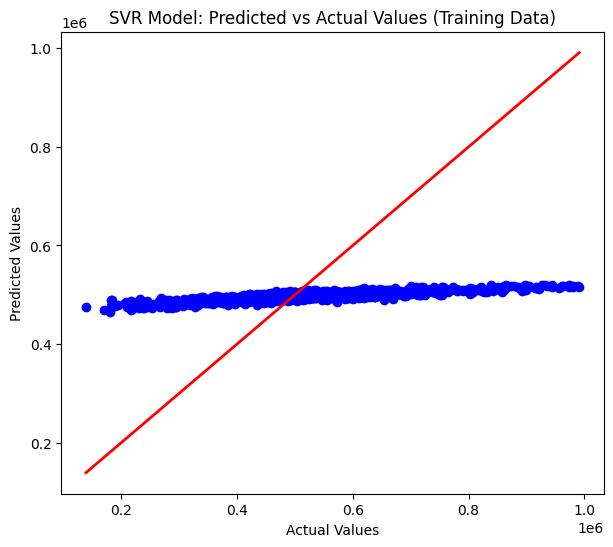

In [93]:
# 1. Plot: Predictions vs Actual values
plt.figure(figsize=(7, 6))
plt.scatter(y_train, y_pred_svr_train, color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', lw=2)
plt.title("SVR Model: Predicted vs Actual Values (Training Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

-------------------------------------------------------------------------------------------------------------------------

<h3> k-nearist neighbor regressor </h3>

In [94]:
from sklearn.neighbors import KNeighborsRegressor

In [95]:
# Initilize the lists to store K vslues and corresponding error
k_values=range(1,21)
errors=[]

#The range 1 to 20 for k_values is commonly used as a starting point because:
-Practical Size: Most datasets respond well to values of k between 1 and 20. It's a manageable size for experimentation that often includes the "sweet spot."
-Too Low or High Can Hurt Performance:
-Low k (like 1): High variance, very sensitive to noise (overfitting).
-High k (like >20): High bias, model may become too simple and underfit.
-Computational Efficiency: Trying too many values (e.g., 1 to 100) can be unnecessary and slow, especially on large datasets. So 1–20 is a balanced range for initial tuning.

In [96]:
k_values

range(1, 21)

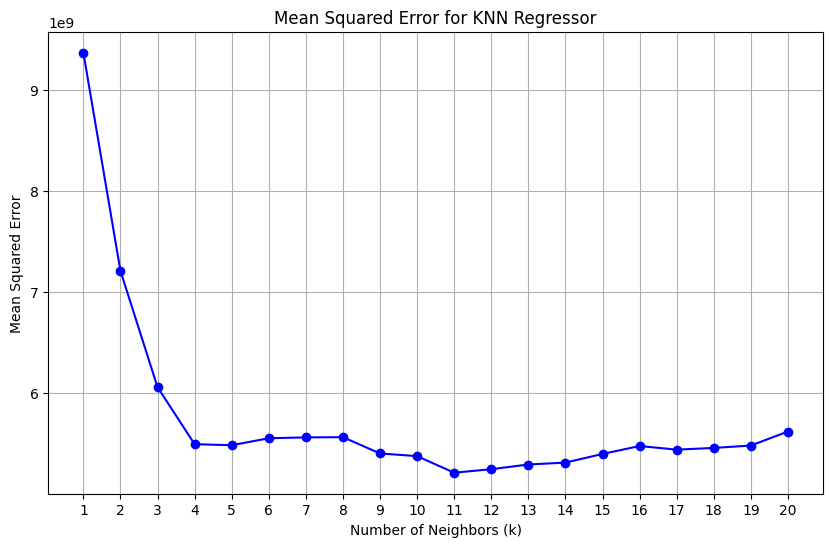

In [97]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Train and evaluate the model for different values of K
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

# Plot the error curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title('Mean Squared Error for KNN Regressor')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean Squared Error")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [98]:
# to find the leasat value of k
optimal_k=k_values[errors.index(min(errors))]
optimal_k

11

In [99]:
# train the dataset
knn_optimal=KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(x_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=11)

In [100]:
#predict on the test set
y_pred_knn_test=knn_optimal.predict(x_test_scaled)

In [101]:
# model evaluation measures:(test data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_knn_model=mean_squared_error(y_test,y_pred_knn_test) # MSE
# root mean square error
rmse_knn_model=np.sqrt(mse_knn_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_knn_model=r2_score(y_test,y_pred_knn_test) #R-square


# Print the results
print("Testing Set Evaluation:")
print(f"MSE: {mse_knn_model}")
print(f"RMSE: {rmse_knn_model}")
print(f"R² Score: {r2_knn_model}")

Testing Set Evaluation:
MSE: 5211244830.87038
RMSE: 72188.95227713435
R² Score: 0.7802277163235741


In [102]:
# adj r2
# adj r2 (test)
adj_r2_knn_model_test=1-(1-r2_knn_model)*((len(y_test)-1)/(len(y_test)-x_test_scaled.shape[1]-1))
adj_r2_knn_model_test

0.7717094107547204

In [103]:
#predict on the train set
y_pred_knn_train=knn_optimal.predict(x_train_scaled)

In [104]:
# model evaluation measures:(train data)
from sklearn.metrics import mean_squared_error,r2_score
# mean square error(MSE):
mse_knn_model=mean_squared_error(y_train,y_pred_knn_train) # MSE
# root mean square error
rmse_knn_model=np.sqrt(mse_knn_model) #RMS
# coefficient of determine (or) goodness of fit-r2
r2_knn_model=r2_score(y_train,y_pred_knn_train) #R-square


# Print the results
print("Testing Set Evaluation:")
print(f"MSE: {mse_knn_model}")
print(f"RMSE: {rmse_knn_model}")
print(f"R² Score: {r2_knn_model}")

Testing Set Evaluation:
MSE: 5373706758.0486
RMSE: 73305.57112558772
R² Score: 0.7985403753119108


In [105]:
# adj r2
# adj r2 (train)
adj_r2_knn_model_train=1-(1-r2_knn_model)*((len(y_train)-1)/(len(y_train)-x_train_scaled.shape[1]-1))
adj_r2_knn_model_train

0.7966416041084415

-------------------------------------------------------------------------------------------------------------------------------------------------

<h3> MODEL COMPARISON Train </H3>

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Dictionary to store results
results = {}

# Dictionary of your trained models
models = {
    "SGD Regressor": sgd_model,
    "KNN (Default)": knn,
    "KNN (Tuned)": knn_optimal,
    "Decision Tree": best_model,
    "Random Forest": best_model_rfr,
    "SVR": best_svr,
    "XGBoost": xgb_model,
    
}

# Evaluate each model on test set
for name, model in models.items():
    y_pred = model.predict(x_train_scaled)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)
    
    results[name] = {
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# Display results as a DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R² Score", ascending=False)
print("\n Model Performance Comparison:")
display(results_df.style.background_gradient(cmap='YlGnBu'))



 Model Performance Comparison:


,R² Score,MAE,MSE,RMSE
XGBoost,0.956158,24889.376953,1169437312.000000,34197.036597
Random Forest,0.913273,36988.699652,2313352347.604433,48097.321626
Decision Tree,0.818964,53243.910429,4828932298.264550,69490.519485
SGD Regressor,0.815640,55425.739145,4917583757.498130,70125.485792
KNN (Tuned),0.798540,57820.810719,5373706758.048600,73305.571126
KNN (Default),0.761734,63168.190299,6355474323.694030,79721.228815
SVR,0.090398,123906.913805,24262613224.981529,155764.608384


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Dictionary to store results
results = {}

# Dictionary of your trained models
models = {
    "SGD Regressor": sgd_model,
    "KNN (Default)": knn,
    "KNN (Tuned)": knn_optimal,
    "Decision Tree":best_model,
    "Random Forest": best_model_rfr,
    "SVR": best_svr,
    "XGBoost": xgb_model,
    
}

# Evaluate each model on test set
for name, model in models.items():
    y_pred = model.predict(x_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

# Display results as a DataFrame
results_df = pd.DataFrame(results).T.sort_values(by="R² Score", ascending=False)
print("\n Model Performance Comparison:")
display(results_df.style.background_gradient(cmap='YlGnBu'))



 Model Performance Comparison:


,R² Score,MAE,MSE,RMSE
Random Forest,0.849530,45197.745102,3567942596.386292,59732.257587
XGBoost,0.838992,46816.273438,3817820672.000000,61788.515697
SGD Regressor,0.835378,48878.916361,3903519751.096739,62478.154191
Decision Tree,0.813082,52294.447293,4432207737.106823,66574.828104
KNN (Tuned),0.780228,57095.640419,5211244830.870380,72188.952277
KNN (Default),0.763012,59699.442379,5619461552.044610,74963.067920
SVR,0.103305,117862.177056,21262444738.729507,145816.476225


<H3> SAVING THE MODEL </H3>

In [108]:
import pickle

# After training your model:
with open('car_price_rf_model.pkl', 'wb') as f:
    pickle.dump(best_model_rfr, f)

<h3>Conclusion</h3>
<h2>Summary of Analysis
• A regression pipeline was developed and tested.
• Achieved good results for predicting car prices with linear regression.
• Model can be improved by using ensemble models or adding external economic factors.

    
Limitations
• Limited dataset size and scope.
• Model performance may drop for outlier vehicles or rare configurations.

Suggested Next Steps
• Implement feature scaling and advanced models.
• Create a UI tool for price estimation</h2>
